### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

In [1]:
library(ggplot2)
library(future)
library(tidyverse)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)
library(readr)
library(arrow)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter



载入程序包：‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6, angle = 30,hjust = 1,vjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### eQTL小提琴图

In [35]:
qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/eQTL_all_lead_perm_qvalues.csv', head =T)
qtl_data

X,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,⋯,pval_nominal,slope,slope_se,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,FAM41C,2022,1.0301083,172.2677,102.1241,1.909544e-03,1_1673060_G_[A],804988,796157,⋯,7.250350e-04,-0.3336273,0.09618098,0.26717328,2.671673e-01,CD8_Naive_T-CCR7,4.845225e-01,3.646037e-05,6.528140e-01,1.220296e-05
1,SAMD11,2174,0.9823966,177.6965,103.1769,2.519391e-02,1_878864_A_[G],-45060,-65711,⋯,1.531192e-02,0.3679977,0.14960122,0.99030097,9.896864e-01,CD8_Naive_T-CCR7,7.182595e-01,2.704642e-05,8.277430e-01,8.587854e-06
2,NOC2L,2214,1.0340234,205.5545,105.8018,8.603882e-03,1_1099457_G_[T],155253,140148,⋯,4.944681e-03,0.2818250,0.09843043,0.82131787,8.217569e-01,CD8_Naive_T-CCR7,6.810705e-01,3.120313e-05,8.004285e-01,1.048631e-05
3,KLHL17,2232,1.0619480,197.3666,103.7193,1.150232e-03,1_951408_A_[G],-9177,-14311,⋯,4.438563e-04,-0.3372850,0.09338473,0.17968203,1.797634e-01,CD8_Naive_T-CCR7,4.187399e-01,3.757373e-05,5.987393e-01,1.299052e-05
4,ISG15,2408,1.0609145,213.4438,103.0671,4.893007e-03,1_1994839_A_[T],993700,980299,⋯,2.287812e-03,0.3272367,0.10500829,0.63103690,6.234010e-01,CD8_Naive_T-CCR7,6.305469e-01,3.456228e-05,7.619737e-01,1.193713e-05
5,AGRN,2478,1.0326697,246.3156,106.3258,6.234921e-04,1_807692_A_[C],-212429,-248426,⋯,2.615585e-04,0.3999089,0.10631174,0.13208679,1.319131e-01,CD8_Naive_T-CCR7,3.680982e-01,2.585255e-05,5.540972e-01,8.675867e-06
6,C1orf159,2662,1.0470378,256.0991,105.5677,1.087198e-03,1_1086035_G_[A],4216,-30326,⋯,4.676658e-04,-0.4400080,0.12233534,0.22787721,2.235818e-01,CD8_Naive_T-CCR7,4.540699e-01,2.682235e-05,6.297271e-01,9.135751e-06
7,TNFRSF18,2740,1.0232855,200.2372,100.3500,9.798842e-03,1_1248062_A_[G],44553,41470,⋯,4.548629e-03,-0.2833886,0.09801204,0.85981402,8.555100e-01,CD8_Naive_T-CCR7,6.892864e-01,3.023333e-05,8.063079e-01,1.004598e-05
8,SDF4,2778,1.0393289,241.9703,104.5946,1.178122e-03,1_1991867_G_[A],774935,759836,⋯,4.822989e-04,-0.2893970,0.08066036,0.23107689,2.315781e-01,CD8_Naive_T-CCR7,4.599130e-01,2.726401e-05,6.346866e-01,9.213100e-06


In [36]:
sundata <- subset(qtl_data, phenotype_id %in% c('PADI2'))
sundata

,X,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,⋯,pval_nominal,slope,slope_se,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
298179,298178,PADI2,3626,1.0489534,345.7124,105.85344,6.408885e-03,1_17380437_A_[G],313675,260986,⋯,3.551533e-03,-0.2997732,0.10080657,0.88321168,8.824744e-01,cDC2-CD1C,7.901184e-01,5.650671e-06,8.108626e-01,6.848842e-06
306821,306820,PADI2,3626,1.0515877,327.6110,104.47482,1.402973e-14,1_17089967_G_[A],23205,-29484,⋯,1.181199e-16,0.6490143,0.06735134,0.00009999,1.168754e-12,cMono-CD14,1.808740e-10,1.704039e-05,3.870319e-10,7.346001e-06
317237,317236,PADI2,3640,0.9944726,253.4592,95.30204,2.467865e-03,1_17093903_C_[G],27141,-25548,⋯,8.335725e-04,0.2515135,0.07330357,0.46175382,4.681280e-01,cMono-IFI44L,7.192741e-01,5.625315e-06,7.260920e-01,6.547281e-06


In [37]:
phenotype_id <- c('PADI2','PADI2')
variant_id <- c('1_17380437_A_[G]','1_17093903_C_[G]')
pval_adj_bh <- c('1.18119926243927e-16','3.551533e-03')
celltype <- c('cDC2-CD1C','cMono-IFI44L')

In [38]:
#变异信息
geno_data <- read_parquet("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/01.Genotype/142_sample_genotype.parquet")
sub_geno_data <- as.data.frame(t(subset(geno_data, variant_id %in% c('1_17380437_A_[G]','1_17093903_C_[G]'))))
colnames(sub_geno_data) <- sub_geno_data[1,]
sub_geno_data <- sub_geno_data[-1, , drop = FALSE]

In [39]:
for (i in 1:length(phenotype_id)){
    sub_phenotype_id <- phenotype_id[i]
    sub_variant_id <- variant_id[i]
    sub_pval_adj_bh <- pval_adj_bh[i]
    sub_celltype <- celltype[i]

    #基因信息
    gene_data <- read.csv(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/02.scRNA-seq/01.pseudobulk/07.gene_expression_csv/",sub_celltype,".csv"))
    sub_gene_data <- subset(gene_data, gene_id %in% c('PADI2','PADI2'))
    sub_gene_data <- as.data.frame(t(sub_gene_data[,-c(1,2,3)]))
    colnames(sub_gene_data) <- sub_gene_data[1,]
    sub_gene_data <- sub_gene_data[-1, , drop = FALSE]
    rownames(sub_gene_data) <- gsub("\\.", "-", rownames(sub_gene_data))

    #信息合并
    sub_geno_data_tmp <- sub_geno_data[,sub_variant_id,drop = FALSE]
    sub_gene_data_tmp <- sub_gene_data[,sub_phenotype_id,drop = FALSE]
    merged_data <- cbind(sub_gene_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_gene_data_tmp)), , drop = FALSE],
                         sub_geno_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_geno_data_tmp)), , drop = FALSE])
    merged_data[[2]] <- as.numeric(merged_data[[2]])
    merged_data[[1]] <- as.numeric(merged_data[[1]])
    merged_data[[2]] <- factor(merged_data[[2]], levels = c("0", "1", "2"))

    #计算中位值
    medians <- merged_data %>%
    group_by(!!sym(names(merged_data)[2])) %>%
    summarize(med = median(.data[[names(merged_data)[1]]], na.rm = TRUE)) %>%
    ungroup()

    #计算beta值
    gene_col <- names(merged_data)[1]
    geno_col <- names(merged_data)[2]
    gene_col_quoted <- paste0("`", gene_col, "`")
    geno_col_quoted <- paste0("`", geno_col, "`")
    #分组拟合线性模型，提取beta值
    fit <- lm(as.formula(paste(gene_col_quoted, "~", geno_col_quoted)), data = merged_data)
    coef_info <- summary(fit)$coefficients
    beta_df <- data.frame(beta = coef_info[2, 1])
    
    #作图
    p <- ggplot(merged_data, aes(x = !!sym(names(merged_data)[2]), y = !!sym(names(merged_data)[1]))) +
         geom_violin(trim = FALSE, scale = "width",fill = '#ABC6D5') +
         geom_boxplot(width = 0.1, outlier.size = 0.5, position = position_dodge(0.9)) +
         geom_line(data = medians, aes(x = !!sym(names(medians)[1]), y = med, group = 1), size = 1, color = '#417B9D',) +
         geom_jitter(aes(x = !!sym(names(merged_data)[2]), y = !!sym(names(merged_data)[1])), size = 1, position = position_jitter(width = 0.15, height = 0),
                    color = '#417B9D') +
         labs(title = paste0("P Interaction = ",sub_pval_adj_bh,"; Celltype = ",sub_celltype, "\nbeta = ",round(beta_df$beta[1],3)), 
              x = colnames(merged_data)[2], y = colnames(merged_data)[1]) +
         mytheme
    ggsave(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/nor_eQTL/',sub_celltype,"_",sub_phenotype_id,"_",sub_variant_id,'.pdf'),p,
          width=3.5,height=5)
}

### caQTL小提琴图

In [31]:
qtl_data <- read.csv('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/caQTL_all_lead_perm_qvalues.csv', head =T)
qtl_data

X,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,⋯,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold,peak,annotation,SYMBOL
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,chr1:778498-778999,1929,1.0645808,169.4195,101.5061,1.083612e-04,1_806178_G_[T],27679,27179,⋯,0.01129887,1.365486e-02,cMono-IFI44L,2.236143e-01,1.586943e-05,2.196920e-01,1.646741e-05,chr1:778498-778999,Promoter (<=1kb),LOC100288069
1,chr1:817103-817604,1957,1.0329543,188.4632,105.1320,7.257285e-07,1_911163_G_[T],94059,93559,⋯,0.00019998,1.005708e-04,cMono-IFI44L,4.335609e-03,1.173549e-05,4.047567e-03,1.219139e-05,chr1:817103-817604,Promoter (<=1kb),FAM87B
2,chr1:827257-827758,1964,1.0248731,190.2065,105.7571,5.455860e-04,1_806178_G_[T],-21080,-21580,⋯,0.08999100,9.214837e-02,cMono-IFI44L,5.565526e-01,1.104176e-05,5.391710e-01,1.147414e-05,chr1:827257-827758,Promoter (<=1kb),LINC00115
3,chr1:869641-870142,2016,0.9956691,176.3600,103.1675,6.278674e-03,1_806178_G_[T],-63464,-63964,⋯,0.67313269,6.724639e-01,cMono-IFI44L,8.165435e-01,9.812985e-06,8.118747e-01,1.020867e-05,chr1:869641-870142,Promoter (<=1kb),FAM41C
4,chr1:959080-959581,2214,1.0507896,183.6780,102.6203,1.032387e-03,1_739041_A_[T],-220040,-220540,⋯,0.15288471,1.549730e-01,cMono-IFI44L,6.339865e-01,1.346134e-05,6.218691e-01,1.397531e-05,chr1:959080-959581,Promoter (<=1kb),NOC2L
5,chr1:966748-967249,2239,1.0072855,181.8297,102.2619,2.053401e-02,1_1432355_A_[G],465606,465106,⋯,0.97570243,9.766514e-01,cMono-IFI44L,8.604346e-01,1.029266e-05,8.601460e-01,1.070283e-05,chr1:966748-967249,Promoter (<=1kb),PLEKHN1
6,chr1:999920-1000421,2376,1.0132326,210.5724,103.3268,1.488209e-03,1_1000814_G_[A],893,393,⋯,0.26207379,2.633336e-01,cMono-IFI44L,7.124687e-01,9.245040e-06,6.963571e-01,9.611277e-06,chr1:999920-1000421,Promoter (<=1kb),HES4
7,chr1:1000649-1001150,2378,0.9818671,207.9698,104.4955,1.373383e-04,1_878884_T_[C],-121766,-122266,⋯,0.03239676,3.026606e-02,cMono-IFI44L,3.518542e-01,7.565178e-06,3.442033e-01,7.874579e-06,chr1:1000649-1001150,Promoter (<=1kb),ISG15
8,chr1:1009115-1009616,2396,1.0029188,182.5737,100.3507,1.747167e-02,1_1203355_C_[G],194239,193739,⋯,0.96120388,9.597351e-01,cMono-IFI44L,8.578538e-01,9.955531e-06,8.580690e-01,1.035402e-05,chr1:1009115-1009616,"Intron (ENST00000624697.4/9636, intron 2 of 2)",ISG15


In [34]:
sundata <- subset(qtl_data, SYMBOL %in% c('PADI2'))
sundata

,X,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,⋯,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold,peak,annotation,SYMBOL
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
435,434,chr1:17066629-17067130,3540,1.0471194,316.6531,104.82707,7.091071e-05,1_16868650_G_[C],-197980,-198480,⋯,0.01419858,1.818529e-02,cMono-IFI44L,2.673133e-01,7.633962e-06,2.615037e-01,7.926470e-06,chr1:17066629-17067130,3' UTR,PADI2
436,435,chr1:17098392-17098893,3572,0.9825974,261.0913,100.64584,4.792660e-09,1_17089160_A_[G],-9233,-9733,⋯,0.00009999,1.596721e-06,cMono-IFI44L,1.091432e-04,6.056765e-06,9.727287e-05,6.304288e-06,chr1:17098392-17098893,"Intron (ENST00000375486.9/11240, intron 3 of 15)",PADI2
437,436,chr1:17118675-17119176,3571,1.0399647,319.1452,104.76548,7.570114e-04,1_17381436_T_[G],262760,262260,⋯,0.20097990,1.988865e-01,cMono-IFI44L,6.708280e-01,7.244004e-06,6.580955e-01,7.523502e-06,chr1:17118675-17119176,Promoter (<=1kb),PADI2
438,437,chr1:17119284-17119785,3572,1.0278243,335.2592,106.35452,9.196746e-04,1_18117498_C_[T],998213,997713,⋯,0.26197380,2.532821e-01,cMono-IFI44L,7.061121e-01,6.384700e-06,6.909950e-01,6.633989e-06,chr1:17119284-17119785,Promoter (<=1kb),PADI2
57242,57241,chr1:17119284-17119785,3572,0.9692858,271.6396,101.91407,8.077878e-04,1_16586330_C_[T],-532955,-533455,⋯,0.21087891,2.094757e-01,CD4_Naive_T-CCR7,6.036961e-01,6.869538e-06,6.652438e-01,5.517654e-06,chr1:17119284-17119785,Promoter (<=1kb),PADI2
386495,386494,chr1:17066629-17067130,3540,1.0237516,336.2684,107.17930,9.511110e-04,1_16510467_A_[C],-556163,-556663,⋯,0.26827317,2.633192e-01,cDC2-CD1C,7.132442e-01,4.745964e-06,6.963497e-01,6.443866e-06,chr1:17066629-17067130,3' UTR,PADI2
386496,386495,chr1:17118675-17119176,3571,0.9997106,273.0711,101.29791,4.882086e-04,1_16706152_C_[A],-412524,-413024,⋯,0.12838716,1.249290e-01,cDC2-CD1C,6.210971e-01,4.953790e-06,5.881769e-01,6.775421e-06,chr1:17118675-17119176,Promoter (<=1kb),PADI2
386497,386496,chr1:17119284-17119785,3572,0.9783539,282.1374,102.87962,5.267682e-03,1_17301576_C_[T],182291,181791,⋯,0.77892211,7.815770e-01,cDC2-CD1C,8.348453e-01,4.113010e-06,8.311260e-01,5.663866e-06,chr1:17119284-17119785,Promoter (<=1kb),PADI2
424749,424748,chr1:17066629-17067130,3540,1.0344114,323.1365,105.61384,2.905041e-03,1_17113383_G_[A],46753,46253,⋯,0.59964004,5.941849e-01,cMono-CD14,6.731887e-01,2.066916e-05,7.963956e-01,7.176345e-06,chr1:17066629-17067130,3' UTR,PADI2


In [18]:
phenotype_id <- c('chr1:17098392-17098893')
variant_id <- c('1_17089160_A_[G]')
pval_adj_bh <- c('7.33508079187523e-33')
celltype <- c('cMono-CD14')
gene_id <- c('PADI2')

In [19]:
#变异信息
geno_data <- read_parquet("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/01.Genotype/142_sample_genotype.parquet")
sub_geno_data <- as.data.frame(t(subset(geno_data, variant_id %in% c('1_17089160_A_[G]'))))
colnames(sub_geno_data) <- sub_geno_data[1,]
sub_geno_data <- sub_geno_data[-1, , drop = FALSE]

In [22]:
for (i in 1:length(phenotype_id)){
    sub_phenotype_id <- phenotype_id[i]
    sub_variant_id <- variant_id[i]
    sub_pval_adj_bh <- pval_adj_bh[i]
    sub_celltype <- celltype[i]
    sub_gene_id <- gene_id[i]

    #基因信息
    gene_data <- read.csv(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/01.Data/03.scATAC-seq/01.pseudobulk/07.peak_accessability_csv/",sub_celltype,".csv"))
    sub_gene_data <- subset(gene_data, gene_id %in% c('chr1:17098392-17098893'))
    sub_gene_data <- as.data.frame(t(sub_gene_data[,-c(1,2,3)]))
    colnames(sub_gene_data) <- sub_gene_data[1,]
    sub_gene_data <- sub_gene_data[-1, , drop = FALSE]
    rownames(sub_gene_data) <- gsub("\\.", "-", rownames(sub_gene_data))

    #信息合并
    sub_geno_data_tmp <- sub_geno_data[,sub_variant_id,drop = FALSE]
    sub_gene_data_tmp <- sub_gene_data[,sub_phenotype_id,drop = FALSE]
    merged_data <- cbind(sub_gene_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_gene_data_tmp)), , drop = FALSE],
                         sub_geno_data_tmp[intersect(rownames(sub_gene_data_tmp), rownames(sub_geno_data_tmp)), , drop = FALSE])
    merged_data[[2]] <- as.numeric(merged_data[[2]])
    merged_data[[1]] <- as.numeric(merged_data[[1]])
    merged_data[[2]] <- factor(merged_data[[2]], levels = c("0", "1", "2"))

    #计算中位值
    medians <- merged_data %>%
    group_by(!!sym(names(merged_data)[2])) %>%
    summarize(med = median(.data[[names(merged_data)[1]]], na.rm = TRUE)) %>%
    ungroup()

    #计算beta值
    gene_col <- names(merged_data)[1]
    geno_col <- names(merged_data)[2]
    gene_col_quoted <- paste0("`", gene_col, "`")
    geno_col_quoted <- paste0("`", geno_col, "`")
    #分组拟合线性模型，提取beta值
    fit <- lm(as.formula(paste(gene_col_quoted, "~", geno_col_quoted)), data = merged_data)
    coef_info <- summary(fit)$coefficients
    beta_df <- data.frame(beta = coef_info[2, 1])
    
    #作图
    p <- ggplot(merged_data, aes(x = !!sym(names(merged_data)[2]), y = !!sym(names(merged_data)[1]))) +
         geom_violin(trim = FALSE, scale = "width",fill = '#AEAFD1') +
         geom_boxplot(width = 0.1, outlier.size = 0.5, position = position_dodge(0.9)) +
         geom_line(data = medians, aes(x = !!sym(names(medians)[1]), y = med, group = 1), size = 1, color = '#3A3E92',) +
         geom_jitter(aes(x = !!sym(names(merged_data)[2]), y = !!sym(names(merged_data)[1])), size = 1, position = position_jitter(width = 0.15, height = 0),
                    color = '#3A3E92') +
         labs(title = paste0("P Interaction = ",sub_pval_adj_bh,"; Celltype = ",sub_celltype, "\nbeta = ",round(beta_df$beta[1],3)), 
              x = colnames(merged_data)[2], y = colnames(merged_data)[1]) +
         mytheme
    ggsave(paste0('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/nor_caQTL//',sub_celltype,"_",sub_phenotype_id,"_",sub_variant_id,'.pdf'),p,
          width=3.5,height=5)
}

### inter eQTL vs inter caQTL

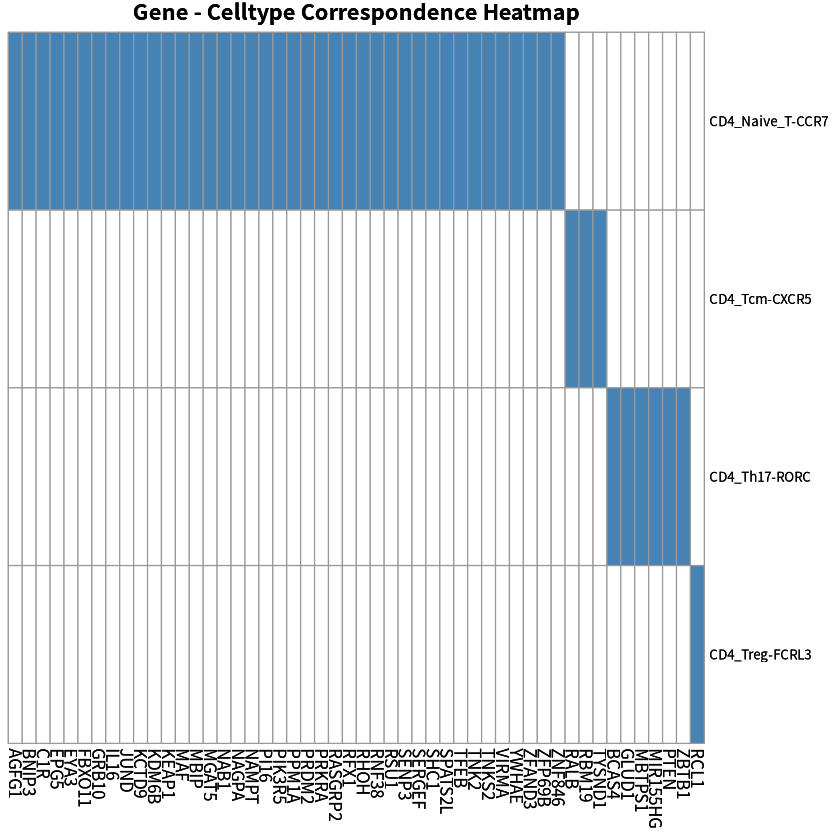

In [44]:
library(pheatmap)

# 你的数据
genes <- c("AGFG1","BNIP3","C1R","EPG5","EYA3","FBXO11","GRB10","IL16","JUND","KCTD9",
           "KDM6B","KEAP1","MAF","MBIP","MGAT5","NAB1","NAGPA","NAMPT","PI16","PIK3R5",
           "PPM1A","PRDM2","PRKRA","RASGRP2","RFX1","RHOH","RNF38","RSU1","SENP3","SERGEF",
           "SHC1","SPATS2L","TFEB","TNK2","TNKS2","VIRMA","YWHAE","ZFAND3","ZFP69B","ZNF846",
           "RALB","RBM19","TYSND1","BCAS4","GLUD1","MBTPS1","MIR155HG","PTEN","ZBTB1","RCL1")

celltypes <- c(rep("CD4_Naive_T-CCR7",40),
               rep("CD4_Tcm-CXCR5",3),
               rep("CD4_Th17-RORC",6),
               "CD4_Treg-FCRL3")

df <- data.frame(gene = genes, celltype = celltypes, stringsAsFactors = FALSE)

# 构建基因 × 细胞类型的矩阵
library(tidyr)
library(dplyr)

heatmap_df <- df %>%
  mutate(value = 1) %>%
  pivot_wider(names_from = celltype, values_from = value, values_fill = 0) %>%
  column_to_rownames(var = "gene")

heatmap_df <- t(heatmap_df)

# 画热图
p <- pheatmap(heatmap_df,
         cluster_rows = FALSE,  # 不聚类基因，保持原始顺序
         cluster_cols = FALSE,  # 不聚类细胞类型
         color = c("white", "steelblue"),
         legend = FALSE,
         show_rownames = TRUE,
         show_colnames = TRUE,
         fontsize_row = 8,
         fontsize_col = 10,
         main = "Gene - Celltype Correspondence Heatmap")
p
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/p2.pdf',p,width = 10,height = 4,limitsize = FALSE)

### DEG vs inter eQTL

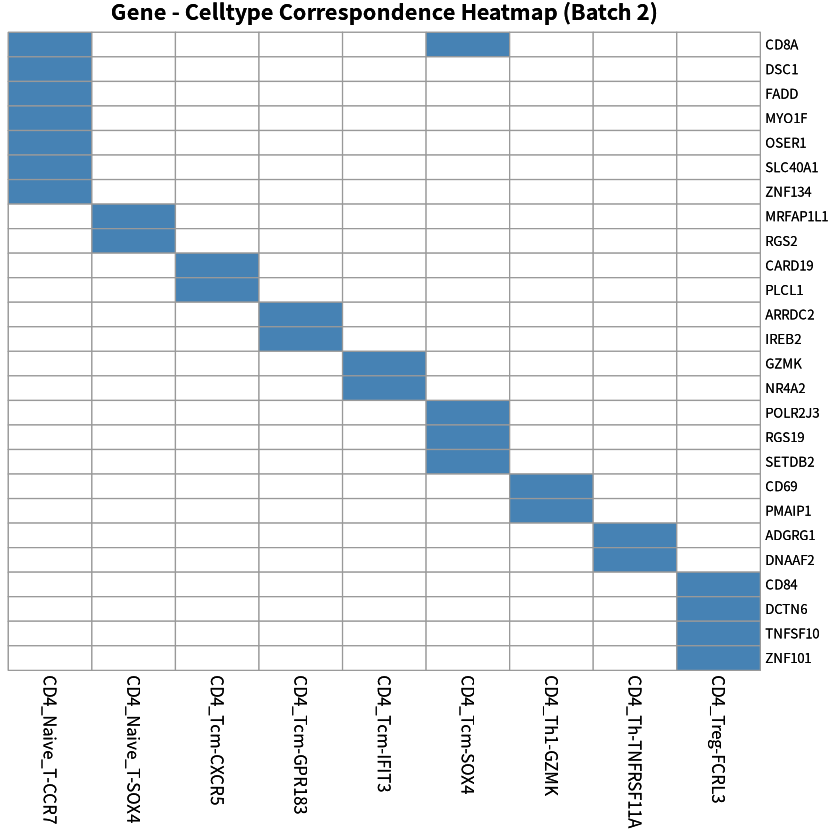

In [47]:
# 你的数据：celltype 和 gene
celltypes <- c("CD4_Naive_T-CCR7","CD4_Naive_T-CCR7","CD4_Naive_T-CCR7","CD4_Naive_T-CCR7","CD4_Naive_T-CCR7",
               "CD4_Naive_T-CCR7","CD4_Naive_T-CCR7","CD4_Naive_T-SOX4","CD4_Naive_T-SOX4","CD4_Tcm-CXCR5",
               "CD4_Tcm-CXCR5","CD4_Tcm-GPR183","CD4_Tcm-GPR183","CD4_Tcm-IFIT3","CD4_Tcm-IFIT3","CD4_Tcm-SOX4",
               "CD4_Tcm-SOX4","CD4_Tcm-SOX4","CD4_Tcm-SOX4","CD4_Th1-GZMK","CD4_Th1-GZMK","CD4_Th-TNFRSF11A",
               "CD4_Th-TNFRSF11A","CD4_Treg-FCRL3","CD4_Treg-FCRL3","CD4_Treg-FCRL3","CD4_Treg-FCRL3")

genes <- c("CD8A","DSC1","FADD","MYO1F","OSER1","SLC40A1","ZNF134","MRFAP1L1","RGS2","CARD19","PLCL1",
           "ARRDC2","IREB2","GZMK","NR4A2","CD8A","POLR2J3","RGS19","SETDB2","CD69","PMAIP1","ADGRG1",
           "DNAAF2","CD84","DCTN6","TNFSF10","ZNF101")

# 转为数据框
df2 <- data.frame(gene = genes, celltype = celltypes, stringsAsFactors = FALSE)

# 生成二值矩阵
heatmap_df2 <- df2 %>%
  mutate(value = 1) %>%
  pivot_wider(names_from = celltype, values_from = value, values_fill = 0) %>%
  column_to_rownames(var = "gene")

# 画热图
p <- pheatmap(heatmap_df2,
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         color = c("white", "steelblue"),
         legend = FALSE,
         show_rownames = TRUE,
         show_colnames = TRUE,
         fontsize_row = 8,
         fontsize_col = 10,
         main = "Gene - Celltype Correspondence Heatmap (Batch 2)")
p
ggsave('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/QTL/01.Dynamic/03.Result/plot/p3.pdf',p,width = 4,height = 8,limitsize = FALSE)